In [1]:
import pandas as pd

# 데이터 로드 및 확인
- head, tail, shape, columns, info, dtypes, describe 확인

In [2]:
df = pd.read_csv("mtcars.csv")

df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [4]:
df.shape[0] #데이터의 갯수

32

In [5]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

- 첫 번째 컬럼명이 누락 데이터를 본 결과 자동차 이름 컬럼

In [6]:
df.rename(columns={'Unnamed: 0':'car_name'}, inplace=True)

In [7]:
df.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [8]:
print("====df_info====")
print(df.info())
print("====df_dtypes=====")
print(df.dtypes)
print("====df_describe====")
print(df.describe())

====df_info====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None
====df_dtypes=====
car_name     object
mpg         float64
cyl           int64
disp        float64
hp            int64
drat        float64
wt          float64
qsec        float64
vs            int64
am            int64
gear          int64
carb          int64
dtype: ob

In [9]:
print("====gear 컬럼 요소의 고유 갯수====")
print(df['gear'].nunique())
print("====transmission 컬럼 요소의 고유 갯수")
print(df['am'].nunique()) #이진 값 0: auto 1: manaul

====gear 컬럼 요소의 고유 갯수====
3
====transmission 컬럼 요소의 고유 갯수
2


# gear와 transmission 관계 분석

In [10]:
import matplotlib.pyplot as plt

## 1. crosstab 사용 X

In [11]:
#gear와 transmission의 조합 구하기 - crosstab 사용 X
u_gear = df['gear'].unique()
u_am = df['am'].unique()

result = {}

for gear in sorted(u_gear):
    for am in sorted(u_am):
        result[(int(gear), int(am))] = df.loc[df['gear'] == gear].loc[df['am'] == am].shape[0]
result

{(3, 0): 15, (3, 1): 0, (4, 0): 4, (4, 1): 8, (5, 0): 0, (5, 1): 5}

In [13]:
print(pd.Series(result))

3  0    15
   1     0
4  0     4
   1     8
5  0     0
   1     5
dtype: int64


In [92]:
list(result.keys())[0]

(3, 0)

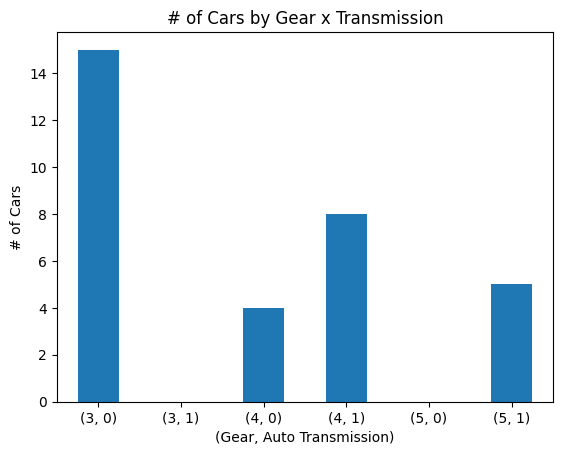

In [93]:
#
pd.Series(result).plot(kind='bar',rot=0, title='# of Cars by Gear x Transmission',
                       xlabel='(Gear, Auto Transmission)',ylabel='# of Cars')

plt.show()

## 2. crosstab 사용 (그래프 미완)

In [99]:
#TODO
#crosstab 사용하기
df2 = pd.crosstab(df['gear'], df['am'])
df2

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [103]:
#이거 어떻게 그리지?

In [95]:
#데이터셋에 포함된 모든 features의 히스토그램
len(df.columns)

12

# 모든 특성의 히스토그램 그리기

Text(0.5, 1.0, 'Histograms of Variables')

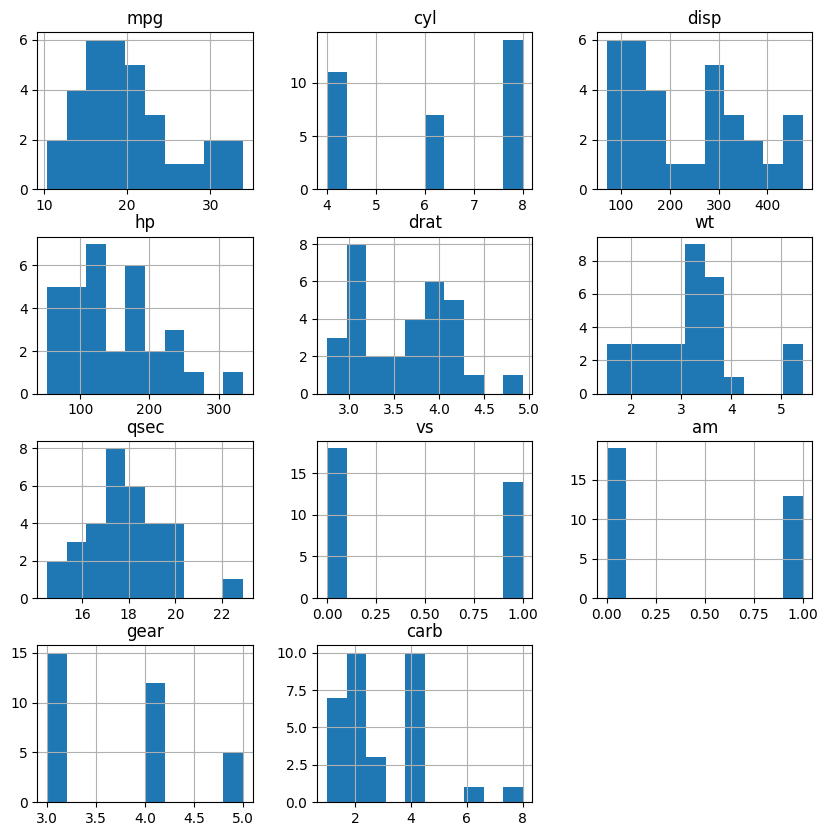

In [96]:
ax = df.hist(figsize=(10,10))
plt.title("Histograms of Variables")

# 산점도 그리기

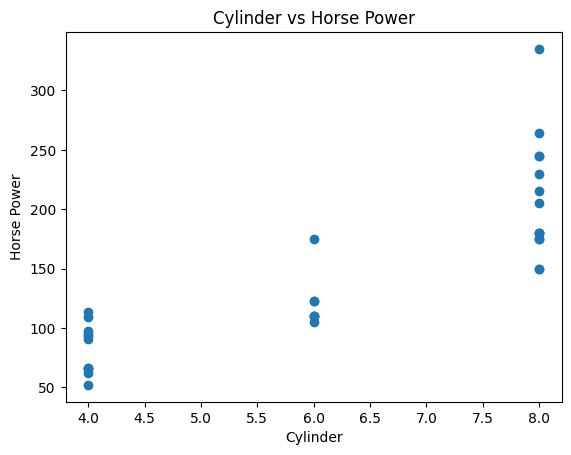

In [48]:
plt.scatter(df['cyl'], df['hp'])
plt.title("Cylinder vs Horse Power")
plt.xlabel("Cylinder")
plt.ylabel("Horse Power")
plt.show()

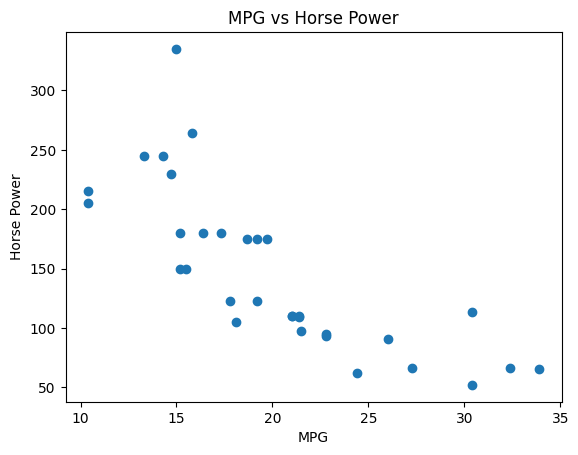

In [49]:
plt.scatter(df['mpg'], df['hp'])
plt.title("MPG vs Horse Power")
plt.xlabel("MPG")
plt.ylabel("Horse Power")
plt.show()

# 변수들 간의 상관 관계 알아보기

In [52]:
df.drop(columns='car_name').corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [16]:
df.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

# 팀 활동 요구사항

## 1. 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

In [18]:
df['brand'] = df["car_name"].apply(lambda x: x.split(" ")[0])
df

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc


In [26]:
df.groupby('brand').mean(numeric_only=True)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
brand,,,,,,,,,,,
AMC,15.200000,8.000000,304.000000,150.000000,3.150000,3.435000,17.300000,0.000000,0.0,3.000000,2.0
Cadillac,10.400000,8.000000,472.000000,205.000000,2.930000,5.250000,17.980000,0.000000,0.0,3.000000,4.0
Camaro,13.300000,8.000000,350.000000,245.000000,3.730000,3.840000,15.410000,0.000000,0.0,3.000000,4.0
Chrysler,14.700000,8.000000,440.000000,230.000000,3.230000,5.345000,17.420000,0.000000,0.0,3.000000,4.0
Datsun,22.800000,4.000000,108.000000,93.000000,3.850000,2.320000,18.610000,1.000000,1.0,4.000000,1.0
Dodge,15.500000,8.000000,318.000000,150.000000,2.760000,3.520000,16.870000,0.000000,0.0,3.000000,2.0
Duster,14.300000,8.000000,360.000000,245.000000,3.210000,3.570000,15.840000,0.000000,0.0,3.000000,4.0
Ferrari,19.700000,6.000000,145.000000,175.000000,3.620000,2.770000,15.500000,0.000000,1.0,5.000000,6.0
Fiat,29.850000,4.000000,78.850000,66.000000,4.080000,2.067500,19.185000,1.000000,1.0,4.000000,1.0


In [27]:
df.groupby('brand')[['mpg', 'hp']].mean()

,mpg,hp
brand,,
AMC,15.200000,150.000000
Cadillac,10.400000,205.000000
Camaro,13.300000,245.000000
Chrysler,14.700000,230.000000
Datsun,22.800000,93.000000
Dodge,15.500000,150.000000
Duster,14.300000,245.000000
Ferrari,19.700000,175.000000
Fiat,29.850000,66.000000


In [28]:
df['brand'].value_counts()

brand
Merc        7
Mazda       2
Fiat        2
Toyota      2
Hornet      2
Duster      1
Camaro      1
Maserati    1
Ferrari     1
Ford        1
Lotus       1
Porsche     1
Pontiac     1
AMC         1
Valiant     1
Dodge       1
Datsun      1
Honda       1
Chrysler    1
Lincoln     1
Cadillac    1
Volvo       1
Name: count, dtype: int64

## 2. 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.


In [51]:
corr_df = df.drop(columns=['car_name', 'brand']).corr()
corr_df


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [41]:
all_corr = corr_df.abs().corr().unstack().sort_values(ascending=False)
all_corr

mpg   mpg     1.000000
cyl   cyl     1.000000
gear  gear    1.000000
am    am      1.000000
vs    vs      1.000000
                ...   
gear  hp     -0.849217
qsec  gear   -0.849915
gear  qsec   -0.849915
carb  am     -0.898736
am    carb   -0.898736
Length: 121, dtype: float64

- 연비와 마력에 대한 평가

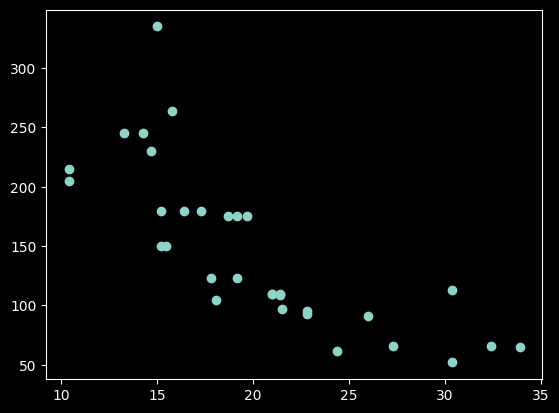

In [47]:
plt.scatter(df['mpg'], df['hp'])

- wt와 hp 분석

0.65 정도의 결과가 나옴

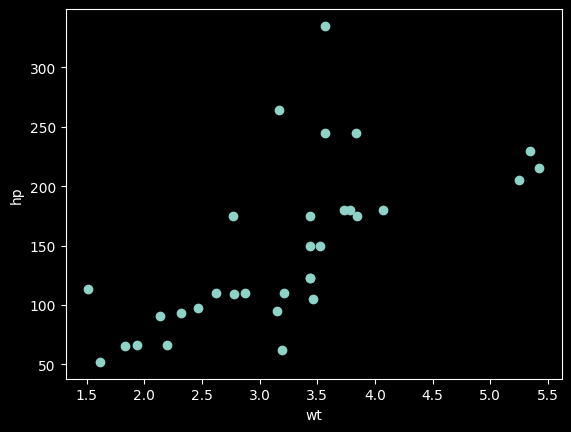

In [50]:
plt.scatter(df['wt'], df['hp'])
plt.xlabel("wt")
plt.ylabel("hp")
plt.show()

In [45]:
df.loc[df['hp']>300]

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8,Maserati


무게와 마력은 어느 정도의 상관관계를 가지지만 예외들이 존재한다.
평균적인 무게를 가지지만 높은 마력을 가진 마세리티 보라 등의 스포츠 카 등은 상관관계를 낮춘다.